# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [1]:

from google.colab import drive
#imports drive library from the module of the google.colab
# drive library represents some functions for working with Google Drive in a Google Colab Notebook
drive.mount('/content/drive',force_remount=True)   # mounts the Google Drive to the Google Colab runtime virtual file system
# That mounting creates a link between Google Drive and Google Colab environment
# Therefore, we can access the files which are stored in the Google Drive directly from Google Colab environment

!ls /content/drive/MyDrive/  # running that command will display a list of files and directories in the specified directory
!cp -r /content/drive/MyDrive/dataset.zip ./
# '/content/drive' represents the point of the mount that is a directory path in the Google Colab runtime
# thus, we can access to the some data of the Google Drive under the '/content/drive' directory

#'!cp -r' command copies the file 'dataset.zip' from the specified Google Drive location
#to the current working directory(represented by './')
# '-r' indicates that to copy the entire directory sturcture if 'dataset.zip' is a folder. Otherwise it is ignored

!unzip dataset.zip
#unzips the 'dataset.zip' file which was copied to the current working directory
# this assumes the unzip tool is suitable on the Google Colab runtime


Mounted at /content/drive
 Classroom	   'Oğuz Kağan Koçak Gantt Chart.gsheet'
'Colab Notebooks'  'Oğuz Kağan Koçak Task 1.2.1.gsheet'
 ColabNotebooks    'PROJECT DOCUMENTATION AND ROADMAP FOR TASK 4.1.gdoc'
 dataset.zip	   'Task 3.1.1.gdoc'
Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
   creating: dataset/scenes/
  inflating: __MACOSX/dataset/._scenes  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/models/
  inflating: __MACOSX/dataset/._models  
  inflating: dataset/scenes/scene12.png  
  inflating: __MACOSX/dataset/scenes/._scene12.png  
  inflating: dataset/scenes/scene10.png  
  inflating: __MACOSX/dataset/scenes/._scene10.png  
  inflating: dataset/scenes/scene11.png  
  inflating: __MACOSX/dataset/scenes/._scene11.png  
  inflating: dataset/scenes/scene5.png  
  inflating: __MACOSX/dataset/scenes/._scene5.png  
  inflating: dataset/scenes/scene4.png  
  inflating: __MACOSX/dataset/

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

In [ ]:
!pwd

/content


[[140 207 234]
 [140 207 234]
 [172 238 255]
 ...
 [153 213 249]
 [124 168 204]
 [124 168 204]]
Original image: 


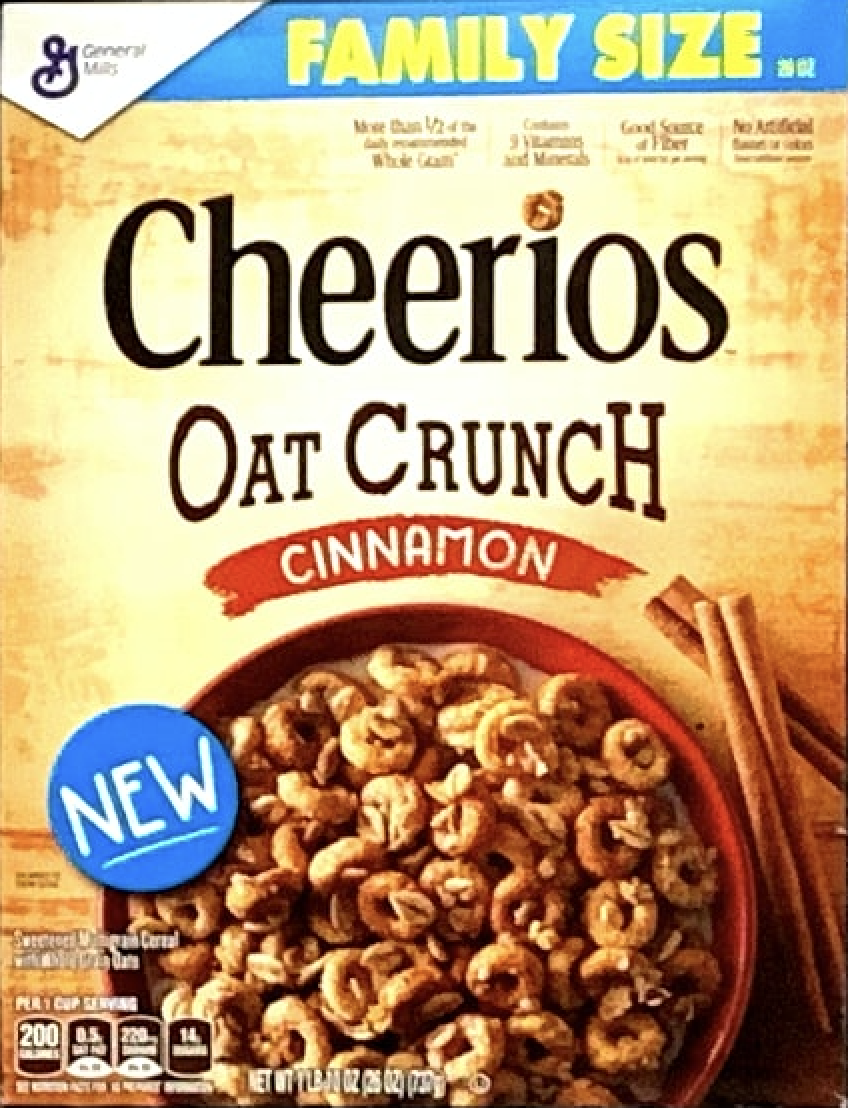

Resized and normalized image: 


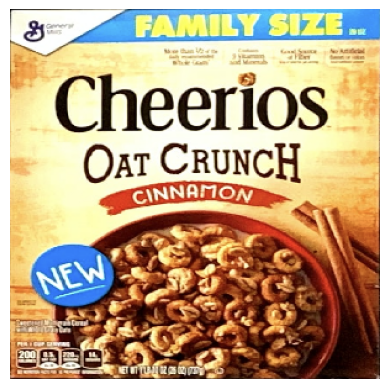

In [2]:
import cv2 # imports the OpenCV library, that is a computer vision library used for many tasks of image processing
import numpy as np # imports the NumPy library, that is used for numerical computations
import matplotlib.pyplot as plt # imports the pyplot module from the matplotlib library for using visualizations and plotting
from google.colab.patches import cv2_imshow # that function is used to display the original image from the corresponding numpy array


#last part, we copied the dataset.zip file to the current working directory(/content), then unzipped that file
# therefore, we write the correct path to read the 'ref1.png' image
image = cv2.imread('dataset/models/ref1.png') # reads an image file named 'fruit_image.jpg' from the current directory using OpenCV's imread() function
# the image is loaded as a NumPy array
# this image has BGR format in its numpy array

print(image[360])
# if the BGR or RGB values are very close to each other, the corresponding color converges to the white color
# there are some historical reasons for the adoption of BGR in computer vision and image processing
# Actually, RGB is more intutive for perception of human and suitable with in web development and graphic design



print("=======================================================")
resized_image = cv2.resize(image, (300,300)) # resizes the original image to a new size of 300x300 pixels using OpenCV's resize() function
# the resized image is stored in the 'resized_image' variable
# there are more than 1 interpolation methods for resizing function in OpenCV library
# the method is 'cv2.INTER_LINEAR', which corresponds to bilinear interpolation.
# that interpolation computes the new pixel value based on a weighted average of the 4 nearest pixels in the input image
# that method is efficient for resizing images

plt.imshow(cv2. cvtColor(resized_image, cv2.COLOR_BGR2RGB))
# displays image using Matplotlib's 'imshow()' function
# the image's color channels are converted from BGR(default format used by OpenCV) to RGB with cv2.cvtColor()
# Matplotlib expects images in RGB format



plt.axis('off') # turns off the axis in the plot, removing the axis labels




normalized_image = resized_image.astype(np.float32) / 255.0
# normalizes the pixel values of the resized image to the range [0,1]
# the image is translated to type float32 of NumPy array by astype() function
# each pixel value is divided by 255.0 to scale them down to the [0,1] range

print("Original image: ")
cv2_imshow(image) # displaying the original image from the corresponding numpy array

print('Resized and normalized image: ')
#cv2_imshow(normalized_image)

# normalized_image is a BGR format with numpy arrays, therfore, first, we should convert it to the RGB format, then, corresponding image format to display
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))

# plt.imshow() function is to display the image
# cv2.cvtColor() function convert the BGR format image to RGB format image because RGB format is necessary for the plt.imshow() function

cv2.waitKey(0) # wait indefinetly until a key is pressed
cv2.destroyAllWindows() #close all windows of OpenCV when the program has finished executing





Resized template image to fit within scene image.


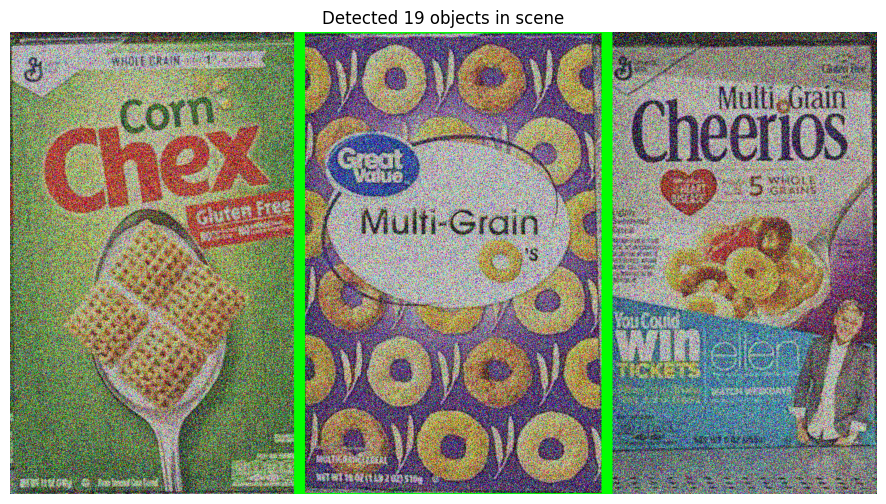

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} could not be loaded.")
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, image_gray

# Function to resize the template if it's larger than the scene image
def resize_template_if_necessary(scene_image_gray, template_image_gray):
    if template_image_gray.shape[0] > scene_image_gray.shape[0] or \
       template_image_gray.shape[1] > scene_image_gray.shape[1]:
        scale_factor = min(scene_image_gray.shape[0] / template_image_gray.shape[0],
                           scene_image_gray.shape[1] / template_image_gray.shape[1])
        new_size = (int(template_image_gray.shape[1] * scale_factor),
                    int(template_image_gray.shape[0] * scale_factor))
        template_image_gray = cv2.resize(template_image_gray, new_size)
        print("Resized template image to fit within scene image.")
    return template_image_gray

# Function to perform template matching and return bounding boxes
def template_matching(scene_image_gray, template_image_gray, threshold, scene_image_name="Scene Image", template_image_name="Template Image"):
    # Ensure the template is smaller than the scene image
    template_image_gray = resize_template_if_necessary(scene_image_gray, template_image_gray)

    method = cv2.TM_CCOEFF_NORMED
    result = cv2.matchTemplate(scene_image_gray, template_image_gray, method)

    locations = np.where(result >= threshold)
    locations = list(zip(*locations[::-1]))
    bounding_boxes = []
    for loc in locations:
        start_x, start_y = loc
        end_x = start_x + template_image_gray.shape[1]
        end_y = start_y + template_image_gray.shape[0]
        bounding_boxes.append((start_x, start_y, end_x, end_y))
        # Mask out the detected region
        cv2.rectangle(scene_image_gray, (start_x, start_y), (end_x, end_y), 0, -1)
    return bounding_boxes

# Function to draw bounding boxes and display results
def draw_and_display_results(scene_image, bounding_boxes):
    for (start_x, start_y, end_x, end_y) in bounding_boxes:
        cv2.rectangle(scene_image, (start_x, start_y), (end_x, end_y), (0, 255, 0), 3)

    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(scene_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {len(bounding_boxes)} objects in scene")
    plt.axis('off')
    plt.show()

# Main function to process images
def process_images(ref_image_path, scene_image_path, threshold=0.35):
    ref_image, ref_image_gray = load_and_preprocess_image(ref_image_path)
    scene_image, scene_image_gray = load_and_preprocess_image(scene_image_path)

    # Pass image names to the template_matching function
    bounding_boxes = template_matching(scene_image_gray, ref_image_gray, threshold,
                                      scene_image_name="Scene Image",
                                      template_image_name="Reference Image")
    draw_and_display_results(scene_image, bounding_boxes)

# Example usage with uploaded image
scene_image_path = 'dataset/scenes/scene2.png'  # Path to the uploaded scene image
ref_image_path = 'dataset/models/ref4.png'  # Path to a reference image

process_images(ref_image_path, scene_image_path, threshold=0.35)
